In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import norm
import pickle
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.colors import LogNorm
from scipy.stats import multivariate_normal as mvn
matplotlib_axes_logger.setLevel('ERROR')
np.random.seed(0)


In [2]:
def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

In [3]:
def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

In [5]:
data1 = load('/content/dataset1.pkl')
data2 = load('/content/dataset2.pkl')
data3 = load('/content/dataset3.pkl')
data = np.stack((data1,data2,data3)).flatten()
initmean = [1,2,3]
initprob = [1/3,1/3,1/3]
initvariance = [1,3,2]
# gmm1d = GM(data,7,initmean,initprob,initvariance)
# gmm1d.run()

In [7]:
gmm1 = GMM(n_components = 3, covariance_type = 'full',max_iter = 2)
data1 = data1.reshape(60,1)
labels = gmm1.fit(data1)

print('converged or not: ', gmm1.converged_)

converged or not:  True


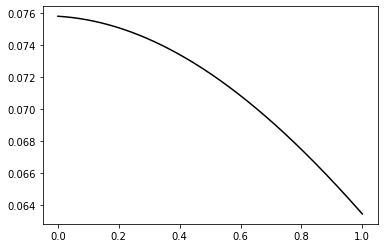

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, 1, 1000).reshape(1000,1)
logprob = gmm1.score_samples(x)
pdf = np.exp(logprob)
ax.plot(x, pdf, '-k')
plt.show()

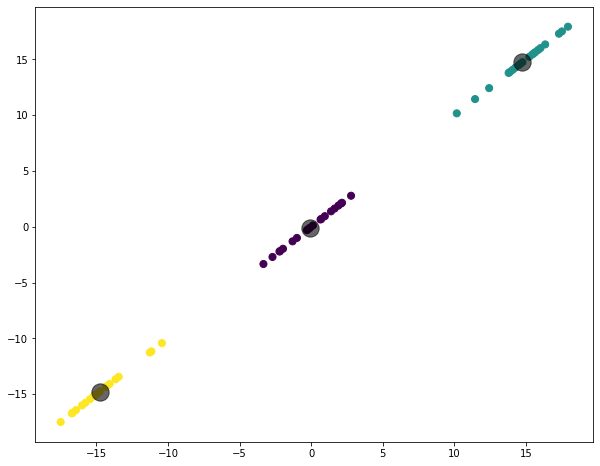

In [9]:
pred_gmm1 = gmm1.predict(data1)
centers = np.zeros((3,2))
for i in range(3):
    density = mvn(cov=gmm1.covariances_[i], mean=gmm1.means_[i]).logpdf(data1)
    centers[i, :] = data1[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(data1[:, 0], data1[:, 0],c=pred_gmm1 ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 0],c='black', s=300, alpha=0.6)

In [10]:
gmm2 = GMM(n_components = 3,covariance_type = 'full',max_iter = 5)
data2 = data2.reshape(60,1)
labels = gmm2.fit(data2)

print('converged or not: ', gmm2.converged_)

converged or not:  True


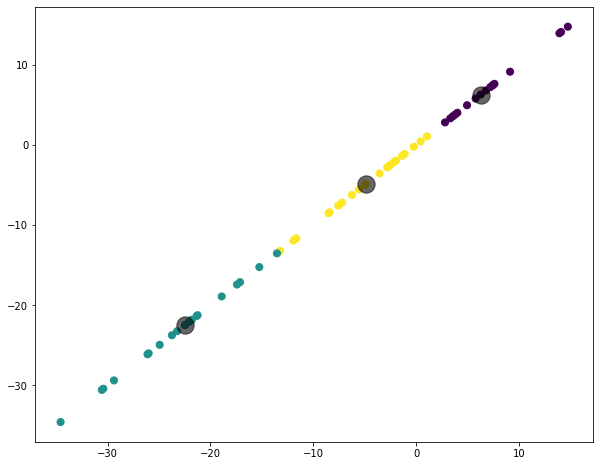

In [11]:
pred_gmm2 = gmm2.predict(data2)
centers = np.zeros((3,2))
for i in range(3):
    density = mvn(cov=gmm2.covariances_[i], mean=gmm2.means_[i]).logpdf(data2)
    centers[i, :] = data2[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(data2[:, 0], data2[:, 0],c=pred_gmm2 ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 0],c='black', s=300, alpha=0.6)

In [12]:
gmm3 = GMM(n_components = 3, covariance_type = 'full',max_iter = 7)
data3 = data3.reshape(60,1)
labels = gmm3.fit(data3)

print('converged or not: ', gmm3.converged_)

converged or not:  True


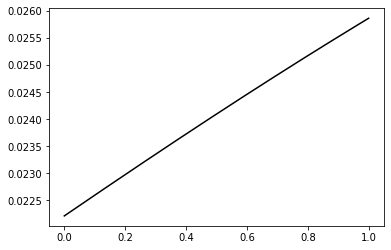

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, 1, 1000).reshape(1000,1)
logprob = gmm3.score_samples(x)
pdf = np.exp(logprob)
ax.plot(x, pdf, '-k')
plt.show()

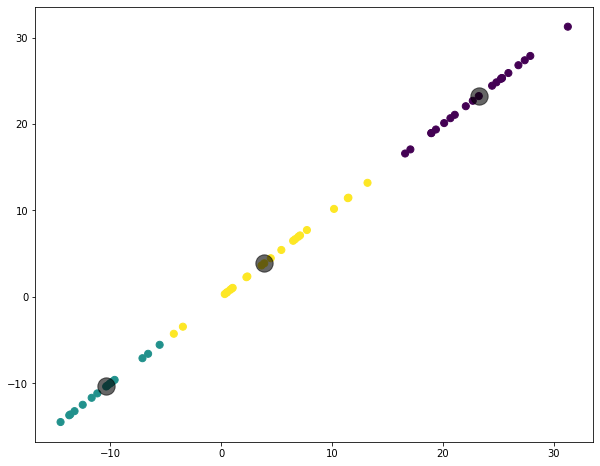

In [14]:
pred_gmm3 = gmm3.predict(data3)
centers = np.zeros((3,2))
for i in range(3):
    density = mvn(cov=gmm3.covariances_[i], mean=gmm3.means_[i]).logpdf(data3)
    centers[i, :] = data3[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(data3[:, 0], data3[:, 0],c=pred_gmm3 ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 0],c='black', s=300, alpha=0.6)